# Semana 8: Pandas 🐼

En las semanas anteriores ya vimos como abrir y guardar archivos, lo cual empleamos particularmente en el contexto de bases de datos. Además vimos el uso de módulos en Python, en particular Numpy, que nos simplificó bastante el manejo de datos numéricos.

Esta semana vamos a comenzar a trabajar con el módulo [`pandas`](https://pandas.pydata.org/), el cual va a facilitarnos la carga y manipulación del contenido de archivos tipo csv, json, etc., que pueden ser muy extensos y con campos de distintos tipos de datos. Vamos a ver cómo este módulo va a permitirnos hacer de manera casi trivial muchas de las cosas que ya veníamos haciendo.

In [ ]:
# Conectar Drive a Colab
from google.colab import drive
import os

# Montar drive
drive.mount("/content/drive/")
# Cambiar directorio
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Lectura de datos y `DataFrames`

`Pandas` permite leer diversos formatos de tablas de datos directamente. Aquí lo vamos a emplear a modo de ejemplo para leer el archivo CSV del arbolado porteño que ya habíamos usado, pero también tiene funciones para leer archivos json, html, de Excel, etc.

In [ ]:
import pandas as pd

arboles = pd.read_csv('arbolado-en-espacios-verdes.csv')
df_ = arboles[(arboles['nombre_com'] == '') & (arboles['altura_tot'] < 2)][cols]
df_ombues.tail(6)

TypeError: ignored

In [ ]:
import pandas as pd

arboles = pd.read_csv('arbolado-en-espacios-verdes.csv')

# pd.read_json()
# pd.read_excel()
# pd.read_html()
# pd.read_xlm()
# pd.read_sql()
# etc.

In [ ]:
arboles

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51497,-58.505752,-34.562998,51725,15,30,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,96104.125550,107350.962385
51498,-58.507111,-34.565843,51726,13,31,0,45,Casuarina,Casuarina cunninghamiana,Árbol Latifoliado Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Casuarinaceas,Casuarina,Exótico,95979.513368,107035.237268
51499,-58.475721,-34.565192,51727,11,28,0,17,Árbol del cielo (Ailanto o Árbol de los dioses),Ailanthus altissima,Árbol Latifoliado Caducifolio,"CAMPELO, LICENCIADO CARLOS",ESTACIÓN COGHLAN - Propiedad particular e/UGAR...,Simarrubáceas,Ailanthus,Exótico,98860.090864,107108.347622
51500,-58.507026,-34.565670,51728,5,32,0,342,Ciprés,Cupressus sp.,Árbol Conífero Perenne,GENERAL PAZ,"LARRALDE, CRISOLOGO, AV. - PAZ, GRAL., AV.- AI...",Cupresáceas,Cupressus,Exótico,95987.288841,107054.471332


El objeto fundamental de `pandas` es el `DataFrame`. Aquí la variable `arboles` es de tipo `DataFrame` y contiene todos los datos del archivo csv estructurados adecuadamente. Por su parte, cada campo (columna) del `DataFrame` es un objeto `Series`. Las series son como arrays de `numpy`, pero cada uno de sus elementos tiene un índice (¡que puede no ser un número entero!)

In [ ]:
#print('Tipo arboles:', type(arboles))
#print('Tipo una de sus columnas:', type(arboles['altura_tot']))

print()
arboles['altura_tot']

0         6
1         6
2         6
3        17
4        17
         ..
51497    15
51498    13
51499    11
51500     5
51501    10
Name: altura_tot, Length: 51502, dtype: int64

Hay dos manera de acceder a los campos: especificando el nombre entre corchetes (como en un diccionario), o poniendo directamente el nombre junto al del `DataFrame` seguido de un punto

In [ ]:
#arboles['origen']
arboles.altura_tot

0                 Exótico
1                 Exótico
2                 Exótico
3        Nativo/Autóctono
4        Nativo/Autóctono
               ...       
51497             Exótico
51498             Exótico
51499             Exótico
51500             Exótico
51501             Exótico
Name: origen, Length: 51502, dtype: object

Además vemos que `pandas` ya asignó inteligentemente del tipo de datos para cada campo. Trató a las alturas como enteros y a los orígenes como objetos (porque son cadenas).

## Exportando los datos de los `DataFrames`

Así como leer datos con `pandas` es muy sencillo, también lo es exportarlos a los distintos formatos disponibles para bases de datos. Podemos exportar el contenido de los dataframes usando:

In [ ]:
# arboles.to_csv('filename.csv')
# arboles.to_json('filename.json')
# arboles.to_sql('filename.sql')
# etc.

## Explorando los datos

Explorar los datos es una parte fundamental del análisis. Con las funciones `head(n)` y `tail(n)` podemos pedir que nos muestren las primeras (o últimas) `n` líneas de la tabla de datos. Si no especificamos nada, toma `n = 5`.

In [ ]:
arboles.head()

In [ ]:
arboles['origen'].tail()

(Nota: `head()` y `tail()` también funcionan con `Series`, columnas de un `DataFrame`)

Usando `arboles.columns` pandas devuelve un índice con los nombres de las columnas del `DataFrame`. A su vez, `arboles.index` muestra el índice del mismo. En este caso el índice es numérico y se corresponde con el número de la línea leida del archivo. En principio no es muy interesante para analizar cuestiones de árboles, simplemente tenemos las filas numeradas. En otros dataframes el índice puede contener información importante (una categoría, una fecha, etc).

In [ ]:
# columnas del dataframe
len(arboles.columns)

17

In [ ]:
# índices de las líneas del dataframe
arboles.index

RangeIndex(start=0, stop=51502, step=1)

Al igual que en Numpy, podemos pedirle el "shape" de los datos, que nos va a proporcionar rápidamente el tamaño de nuestra tabla de datos

In [ ]:
arboles.shape

(51502, 17)

Una herramienta sumamente útil para inspeccionar los datos recién levantados es el método `info()`, que nos resume la información de las columnas, dándonos su nombre, tipo y si hay valores faltantes:

In [ ]:
arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51502 entries, 0 to 51501
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   long        51502 non-null  float64
 1   lat         51502 non-null  float64
 2   id_arbol    51502 non-null  int64  
 3   altura_tot  51502 non-null  int64  
 4   diametro    51502 non-null  int64  
 5   inclinacio  51502 non-null  int64  
 6   id_especie  51502 non-null  int64  
 7   nombre_com  51502 non-null  object 
 8   nombre_cie  51502 non-null  object 
 9   tipo_folla  51502 non-null  object 
 10  espacio_ve  51502 non-null  object 
 11  ubicacion   50529 non-null  object 
 12  nombre_fam  51502 non-null  object 
 13  nombre_gen  51502 non-null  object 
 14  origen      51502 non-null  object 
 15  coord_x     51502 non-null  float64
 16  coord_y     51502 non-null  float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.7+ MB


Otro método útil es `describe()`, que nos da un breve informe de todos los datos numéricos que contiene el `DataFrame`. Para ver mejor una parte, podemos seleccionar algunas columnas de interés antes de pedirle la descripción.

In [ ]:
arboles.describe()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,coord_x,coord_y
count,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000,51502.000000
mean,-58.439558,-34.606839,25866.623296,12.167100,39.395616,3.472215,112.769504,102177.845378,102487.232275
std,0.044614,0.042900,14936.773619,7.640309,31.171205,7.039495,162.693940,4092.013488,4759.012618
min,-58.529743,-34.697716,1.000000,0.000000,1.000000,0.000000,1.000000,93908.249224,92406.931681
25%,-58.471941,-34.642570,12927.250000,6.000000,18.000000,0.000000,11.000000,99207.890607,98523.875134
50%,-58.441735,-34.608041,25870.500000,11.000000,32.000000,0.000000,38.000000,101977.701395,102352.136672
75%,-58.409357,-34.570255,38800.750000,18.000000,54.000000,5.000000,208.000000,104948.266310,106545.694405
max,-58.353746,-34.527167,51729.000000,54.000000,500.000000,90.000000,999.000000,110046.627207,111326.573930


## Selección de datos

Una de las operaciones primitivas más importantes es la selección de fragmentos de las tablas de datos, ya sean filas, columnas o rangos de filas y columnas.

Por ejemplo con `arboles['nombre_com']` veremos la columna (que es una serie) de nombres comunes de los árboles en la base. Podemos usar `unique` para ver una vez cada nombre:

In [ ]:
arboles['nombre_com']

0                    Washingtonia (Palmera washingtonia)
1                    Washingtonia (Palmera washingtonia)
2                    Washingtonia (Palmera washingtonia)
3                                                   Ombú
4                                                   Ombú
                              ...                       
51497                                          Casuarina
51498                                          Casuarina
51499    Árbol del cielo (Ailanto o Árbol de los dioses)
51500                                             Ciprés
51501                                             Ciprés
Name: nombre_com, Length: 51502, dtype: object

In [ ]:
arboles.nombre_com.unique()

array(['Washingtonia (Palmera washingtonia)', 'Ombú', 'Catalpa', 'Ceibo',
       'Brachichiton (Árbol botella, Brachichito)', 'Álamo plateado',
       'Acacia de constantinopla', 'Acacia', 'Roble sedoso (Grevillea)',
       'Arce', 'Palo borracho rosado', 'Álamo negro del Canada',
       'Jacarandá', 'Álamo carolina', 'Aguaribay', 'Paraíso',
       'Espinillo (Aromo)', 'Eucalipto', 'Ciprés leylandi', 'Ciprés',
       'No Determinable', 'Álamo', 'No Determinado', 'Cedro', 'Lapacho',
       'Crataegus', 'Cedro de San Juan', 'Juniperus', 'Chamaecyparis',
       'Álamo blanco piramidal', 'Podocarpus', 'Tuja', 'El chañar',
       'Arce tridente', 'Citricos', 'Sauce', 'Viburnum dulce',
       'Corona de cristo', 'Taxodium', 'Mirto', 'Árbol del humo',
       'Celtis tala', 'Criptomeria (Cedro del Japón)', 'Coculus, Cóculo',
       'Caoba del sur', 'Arce blanco', 'Malus', 'Agatis blanco',
       'Cotoneaster', 'Fenix', 'Libocedro (Calocedro)', 'Callistemon',
       'Magnolia', 'Ligustro', 'Pal

In [ ]:
len(arboles['nombre_com'].unique())

337

También podemos pedir que cuente cuántas entradas hay para cada valor posible de nombre común y lo devuelva en un objeto series con `value_counts()`. Notar que quedan ordenados por cantidad de cuentas:

In [ ]:
cant_ejemplares = arboles['nombre_com'].value_counts()
cant_ejemplares.head(10)

Eucalipto               4112
Tipa blanca             4031
Jacarandá               3255
Palo borracho rosado    3150
Casuarina               2719
                        ... 
Quebracho colorado         1
Sesbania                   1
Ligustrum                  1
Agave vivipara             1
Caranday                   1
Name: nombre_com, Length: 337, dtype: int64

Como hacíamos con los `ndarrays` en `numpy`, podemos preguntar cuáles se llaman de cierta manera (`'Ombú'` en este caso):

In [ ]:
arboles['nombre_com'] == 'Ombú'

Nos da una serie de verdaderos y falsos, dependiendo de si cumplía la condición o no. Y al igual que en `numpy`, podemos usar esto para quedarnos solo con los ombúes del `DataFrame`:

In [ ]:
cond = arboles['nombre_com'] == 'Ombú'
arboles[cond]

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997
5,-58.478103,-34.644641,6,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98642.816930,98294.764318
6,-58.478095,-34.644677,7,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98643.560005,98290.751713
2344,-58.397727,-34.599373,2345,8,36,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"HOUSSAY, BERNARDO A., Dr.","URIBURU, JOSE E., PRES. - PARAGUAY - JUNIN - C...",Fitolacáceas,Phytolacca,Nativo/Autóctono,106015.043760,103314.714102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51247,-58.412358,-34.568882,51475,11,271,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"GOULD, BENJAMIN A., Dr.","SARMIENTO, AV. - CASARES, AV. - ROLDAN, BELISA...",Fitolacáceas,Phytolacca,Nativo/Autóctono,104674.609347,106697.853986
51249,-58.411934,-34.568892,51477,9,298,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"GOULD, BENJAMIN A., Dr.","SARMIENTO, AV. - CASARES, AV. - ROLDAN, BELISA...",Fitolacáceas,Phytolacca,Nativo/Autóctono,104713.484459,106696.730428
51250,-58.412035,-34.569100,51478,10,170,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"GOULD, BENJAMIN A., Dr.","SARMIENTO, AV. - CASARES, AV. - ROLDAN, BELISA...",Fitolacáceas,Phytolacca,Nativo/Autóctono,104704.271282,106673.697485
51362,-58.429088,-34.561101,51590,7,78,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"PUEYRREDON, CARLOS ALBERTO, Dr.","BELLO, ANDRES - ALSINA, VALENTIN, AV. - DE LOS...",Fitolacáceas,Phytolacca,Nativo/Autóctono,103139.666654,107561.747460


In [ ]:
# Hago un nuevo DataFrame solo con los ombues
df_ombues = arboles[   arboles['nombre_com'] == 'Ombú'  ]
df_ombues.head()

En este último ejemplo ya podemos notar una particularidad de `pandas`: se conservan los índices originales del dataframe de `arboles`. Si quisieramos redefinirlos, podemos usar `reset_index()`:

In [ ]:
df_ombues = df_ombues.reset_index()
df_ombues.head()

También podemos seleccionar varias de las columnas a la vez:

In [ ]:
cols = ['altura_tot', 'diametro', 'inclinacio']
arboles_sel = arboles[cols]
arboles_sel.head()

,altura_tot,diametro,inclinacio
0,6,35,0
1,6,35,0
2,6,35,0
3,17,50,0
4,17,50,0


Y podemos combinar todas estas cosas

In [ ]:
cols = ['nombre_com', 'altura_tot', 'diametro', 'inclinacio']
# uso el operador & para pedirle más de una condición
df_ombues = arboles[(arboles['nombre_com'] == 'Ombú') & (arboles['altura_tot'] > 10)][cols]
df_ombues.head(1000)

,nombre_com,altura_tot,diametro,inclinacio
3,Ombú,17,50,0
4,Ombú,17,50,0
5,Ombú,17,50,0
6,Ombú,17,50,0
2485,Ombú,15,140,0
...,...,...,...,...
50058,Ombú,18,130,0
50213,Ombú,23,71,0
50890,Ombú,12,50,0
51247,Ombú,11,271,0


Noten que en este caso debemos usar los operadores `&`, `|` y `~` en lugar de `and`, `or` y `not`. Esto se debe a que `and`, `or` y `not` implícitamente convierten aquello que está en la condición en números booleanos, pero `&`, `|` y `~` en su lugar nos permiten que se haga la comparación elemento a elemento del dataframe (¡También funciona con arrays de `numpy`!). Veamos el siguiente caso:

In [ ]:
import numpy as np

a = np.array([1, 0, 2, -1])

(abs(a) < 2) & (a > 0)
#(arboles['nombre_com'] == 'Ombú') & (arboles['altura_tot'] > 10)
#(arboles['nombre_com'] == 'Ombú') and (arboles['altura_tot'] > 10)

array([ True, False, False, False])

Una última cosa importante a notar es que con las series de `pandas` también podemos operar de la misma manera en la que lo hacíamos con los arrays de `numpy`:

In [ ]:
arboles['altura_tot']*2

0        12
1        12
2        12
3        34
4        34
         ..
51497    30
51498    26
51499    22
51500    10
51501    20
Name: altura_tot, Length: 51502, dtype: int64

In [ ]:
arboles['altura_tot']/arboles['diametro']

0        0.171429
1        0.171429
2        0.171429
3        0.340000
4        0.340000
           ...   
51497    0.500000
51498    0.419355
51499    0.392857
51500    0.156250
51501    0.285714
Length: 51502, dtype: float64

In [ ]:
arboles['diametro']**3

## Ejemplos

**a)** (De los Ejs. de la semana 5) Hacer un código que cree una lista con las alturas de los arboles (columna `'altura_tot'`) de una determinada especie (por ejemplo, probar con `'Jacarandá'` de la columna `'nombre_com'`).

In [ ]:
especie = 'Jacarandá'
#df_jacarandas = arboles[arboles['nombre_com']==especie]
#list(df_jacarandas['altura_tot'])
list(arboles[arboles['nombre_com']==especie]['altura_tot'])

**b)** (De los Ejs. de la semana5) ¿Cuántos espacios verdes diferentes podemos encontrar en CABA?

In [ ]:
len(arboles['espacio_ve'].unique())

583

**c)** Crear un DataFrame que contenga solo los Ceibos del parque 'CENTENARIO'. Reajustá los índices del mismo.

In [ ]:
df_ceibos_centenario = arboles[(arboles['nombre_com']=='Ceibo') & (arboles['espacio_ve']=='CENTENARIO')]
df_ceibos_centenario.reset_index()

## Acceso y selección de datos por índice o posición

Podemos acceder a una fila de un `DataFarme` o una `Serie` tanto a través de su posición como a través de su índice. Para acceder con el índice usá `loc[]`:

In [ ]:
arboles.loc[127]

Para acceder por número de posición usá `iloc`

In [ ]:
arboles.iloc[127]

En ese caso es lo mismo, porque el índice y el número de elemento son lo mismo. Veamos el caso de la serie del ejemplo que vimos con `value_counts()`. En ese caso tenía como índice el nombre de las especies:

In [ ]:
cant_ejemplares = arboles['nombre_com'].value_counts()
cant_ejemplares.index

In [ ]:
cant_ejemplares.iloc[4]

In [ ]:
cant_ejemplares.loc['Casuarina']

También pueden surgir problemas al usar el índice luego de que hicimos un filtrado de datos, ya que algunos valores de índices podrían ya no existir. Es común toparse con este tipo de error:

In [ ]:
df_ceibo_cent = arboles[(arboles['nombre_com'] == 'Ceibo') & (arboles['espacio_ve'] == 'CENTENARIO')]

for i in range(len(df_ceibo_cent)):
  print(df_ceibo_cent.loc[i])

\

Además podemos usar slices como lo hacíamos usualmente

In [ ]:
lista = [1, 2, 3]
lista[-2:-3]

In [ ]:
arboles.iloc[-10:-5]

O, como vimos recién, pasarle arrays de verdaderos y falsos para quedarse solo con las posiciones donde hay `True`s.

## Máximos, mínimos, etc...

Algunos de los métodos más básicos y útiles de DataFrames y series de `pandas` son los que nos dan los máximos y mínimos.

Por ejemplo, tenemos un método `max()` (y también uno `min()`)

In [ ]:
## Plots
arboles['altura_tot'].max()

In [ ]:
arboles['altura_tot'].idxmax()

Pero a veces nos interesa saber el índice de ese máximo (minimo). Para eso tenemos el método `idxmax()` que hace exactamente eso. Por ejemplo, en el ejercicio de los árboles de la semana 5 que pedía el árbol más alto:

In [ ]:
indice_max = arboles['altura_tot'].idxmax()
arboles.loc[indice_max]

Por supuesto hay muchos métodos y funciones más incluidos en el paquete. Algunos los vamos a ir viendo, otros los pueden buscar en la documentación a medida que los necesiten (puede llegar a ser tan simple como buscar en internet "Cómo hacer X en pandas").

## Plots

Pandas también nos permite hacer plots de manera nativa (¡para lo cual internamente usa otros paquetes de Python como `seaborn`!). El tema de sí de gráficos lo vamos a dejar para más adelante, pero vamos a mostrar un poco el uso básico ya que hacer gráficos rápidamente nos facilita la exploración de los datos.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='diametro', ylabel='altura_tot'>

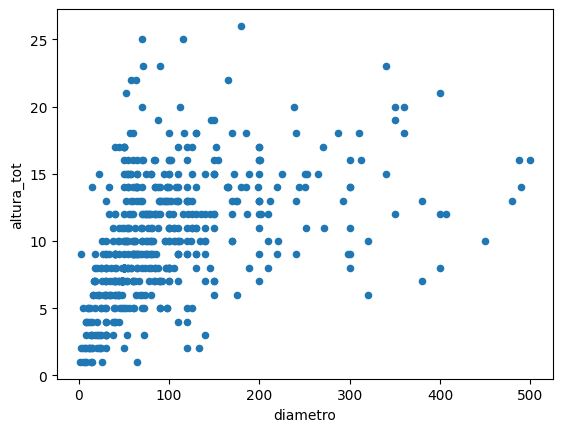

In [ ]:
# Hago otro dataframe con solo los ombúes
df_ombues = arboles[arboles['nombre_com'] == 'Ombú']

# Plotteo un gráfico de scatter
df_ombues.plot.scatter(x = 'diametro', y = 'altura_tot')

En el gráfico de dispersión de puntos le indicamos que columna usar como el *x* y el *y* del gráfico. También podemos hacer histogramas para los valores de una columna. Los mismo son barras con altura igual a la cantidad de datos que hay con valores dentro del rango indicado por el ancho de la barra en el eje *x*:

In [ ]:
# Ahora hago un histograma
df_ombues.altura_tot.plot.hist(bins = 25, figsize=(4, 4))

## Definiendo y modificando dataframes

Hay muchas maneras de construir un `DataFrame`. La más usual es la que acabamos de usar: leerlo de un archivo. Pero también podemos construir uno nosotros, por ejemplo a partir de un diccionario:

In [ ]:
# Defino un diccionario
d = {'col1': [1, 2, 5], 'col2': [3, 4, 9]}

# Lo uso para crear un dataframe
df = pd.DataFrame(data=d)
#df.to_csv("aaaa.csv")

O a partir de arrays de `numpy`:

In [ ]:
import numpy as np

# Hago un dataframe a partir de un array
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'cc'])
df2

También podemos usar tuplas, listas, etc. Al armarlo también podemos especificarle lo que queremos utilizar como índices:

In [ ]:
# Hago listas de alumnos y notas
alumnos = ['Carla', 'Daniel', 'Fernan', 'Ivan']
notas = [np.random.randint(10)+1 for i in range(4)]

# Hago un dataframe de alumnos usando los nombres como índice
df_alumnos = pd.DataFrame(data={'Calificacion': notas}, index=alumnos)
df_alumnos

Podemos agregarle campos al dataframe

In [ ]:
# Hago lista de aprobados
aprobado = [nota>6 for nota in notas]

# La agrego al dataframe
df_alumnos['Aprobado'] = aprobado
df_alumnos

O quitárselos, por ejemplo con `drop()`

In [ ]:
df_alumnos = df_alumnos.drop(columns='Aprobado')
df_alumnos

## Otras funcionalidades útiles

Ahora vamos a ver algunas otras funcionalidades que nos proporciona `pandas`. Recuerden que en la documentación pueden explorar todo lo que hay disponible.

### Método `isin()`

Pandas incluye muchas funciones útiles. Por ejemplo, el método `isin()` nos devuelve un Dataframe de `Trues` y `False` dependiendo de si aparece o no lo que le pedimos:

In [ ]:
df_alumnos

In [ ]:
df_alumnos.isin([5,9])

También podemos especificarle la columna en donde debe buscar

In [ ]:
df_alumnos.isin({'Calificacion':[5,9]})

Volviendo al DataFrame de los árboles:

In [ ]:
jacarandas_y_ceibos = arboles[   arboles['nombre_com'].isin(['Jacarandá', 'Ceibo'])   ]
jacarandas_y_ceibos.shape

O sea, usamos el método `isin()` para buscar en la serie `arboles['nombre_com']` donde están los jacarandás y los ceibos, eso devuelve una serie de verdaderos y falsos

In [ ]:
arboles[  arboles['nombre_com'].isin(['Jacarandá', 'Ceibo']) & (arboles['altura_tot']>10) ]

Luego usamos esa series para evaluar el dataframe sólo en los índices verdaderos de esa serie.

### Método `groupby()`

Otro método útil es `groupby()`, que junta todas la líneas que cumplan una misma condición. Por ejemplo, podemos agrupar a los árboles por especie y tomar el valor medio para todas las entradas de cada grupo:

In [ ]:
arboles.groupby(by=['nombre_com']).mean()

O sumar todo

In [ ]:
arboles.groupby(by=['nombre_com']).sum()

En estos dos ejemplos, el `.mean()` y el `.sum()` está indicando que tiene que hacer con los valores que fueron agrupados. En el primer caso toma el promedio de los valores, en el segundo solo los suma.

### Método `map()`

El método `map()` nos permite aplicar una función a todos los elementos de una Serie o DataFrame.

In [ ]:
alumnos = ['Carla', 'Daniel', 'Fernan', 'Ivan']
notas = [np.random.randint(10)+1 for i in range(4)]

df_alumnos = pd.DataFrame({'Alumno':alumnos, 'Calificacion': notas})
df_alumnos

In [ ]:
# Defino una función para cambiar los nombres a minúsculas
def minusculas(cadena):
  return cadena.lower()

# Aplico la función a la columna 'Alumno'
df_alumnos['Alumno'] = df_alumnos['Alumno'].map(minusculas)
df_alumnos

Si queremos aplicar una función sin definirla antes, podemos usar las funciones anónimas *lambda*:

In [ ]:
df_alumnos = pd.DataFrame({'Alumno':alumnos, 'Calificacion': notas})

print(df_alumnos)
# Aplico la función a la columna 'Alumno'
df_alumnos['Alumno'] = df_alumnos['Alumno'].map(lambda x: x.lower())
df_alumnos

### Funciones anónimas (lambda)

En Python podemos crear funciones sin nombre, usando la palabra clave `lambda`. Generalmente se usa cuando queremos usar una función simple para una tarea muy específica, por lo que no vale la pena definirla y dársela a conocer a todo el entorno del programa:

In [ ]:
f1 = lambda x: x**2      # la variable f1 tiene una función elevar al cuadrado

Esto es equivalente a haber creado una función de la siguiente forma:

In [ ]:
def f2(x):
  return x**2

Veamos cuando las llamamos:

In [ ]:
f1(2), f2(2)

(4, 4)

Esta técnica es muy útil, por ejemplo, cuando queremos pasar una función simple como argumento de otra función:

In [ ]:
list(map(lambda x: x**2, range(-3,4)))

La función `map()` aplica una función dada a cada elemento de un iterable (en este caso, el iterable es  `range(-3, 4)`), devolviendo un objeto map. La función lambda que se pasa a `map()` eleva cada elemento al cuadrado.

Entonces, en este caso, `range(-3, 4)` crea un rango de números enteros que van desde -3 hasta 3 (sin incluir el 4). Luego, la función `map()` aplica la función `lambda x: x**2` a cada uno de estos números, lo que eleva cada número al cuadrado. Finalmente, el resultado se convierte en una lista utilizando la función `list()`.

*Recordar que:* 

*`map()` es una función incorporada en Python que toma una función y un iterable como argumentos y devuelve un objeto `map` que contiene los resultados de aplicar la función a cada elemento del iterable.* 

*Sintaxis:  `map(función, iterable)`*

## Trabajando con datos faltantes o repetidos

Muchas veces va a ocurrir que las bases de datos que nos proporcionan tienen errores. En particular, es común que hayan datos faltantes o líneas repetidas.

Para remover líneas repetidas, tenemos el método `drop_duplicates()`. Para demostrar esto podemos duplicar el contenido del DataFrame, haciendo una concatenación de dos copias del mismo:

In [ ]:
arboles.shape

(51502, 17)

In [ ]:
# Duplicamos el contenido del dataframe usando el la función concat()
arboles_2 = pd.concat([arboles, arboles])

# Veamos que forma tiene ahora:
arboles_2.shape

(103004, 17)

Si ahora usamos `drop_duplicates()`

In [ ]:
arboles_2 = arboles_2.drop_duplicates()

# Veamos que forma tiene ahora:
arboles_2.shape

Pasemos ahora al caso de datos faltantes (muy frecuente en bases de datos reales). Usualmente van a aparecer como `None`, o incluso `np.nan` (de numpy). Para ver cuántos valores vacíos hay, podemos usar el método `isnull()`, que nos devuelve un DataFrame de booleanos indicando en dénde hay datos vacíos

In [ ]:
arboles.isnull()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Para poder contar cuántos datos vacíos hay, podemos usar el método `sum()`

In [ ]:
arboles.isnull().sum()

Pero, ¿cómo nos deshacemos de los datos vacíos? Para ellos por ejemplo podemos usar el método `dropna()`. El mismo remueve todas las *filas* con datos faltantes:

In [ ]:
arboles.shape

(51502, 17)

In [ ]:
arboles_2 = arboles.dropna()

arboles_2.shape

(50529, 17)

Si quisiésemos tirar las *columnas* con datos faltantes en lugar de las filas, podemos usar la opción `axis=1` (como en numpy)

In [ ]:
arboles_3 = arboles.dropna(axis=1)

arboles_3.columns

Pero a veces tirar las filas/columnas con datos faltantes puede llegar a reducir mucho nuestro dataset. Por eso a veces podemos llegar a optar por rellenarlos con otra cosa (usando el valor medio de esa columna, o tal vez un valor determinado). En nuestro caso, la única columna con problemas era la de "ubicacion". Podemos rellenarla, por ejemplo, con el valor "SIN UBICACION" usando el método `fillna()`:

In [ ]:
arboles_filled = arboles.fillna("SIN UBICACION")

arboles_filled.isnull().sum()

In [ ]:
arboles.isnull().sum()

Qué hacer dependerá en definitiva del caso específico con el que estemos tratando.

## Sobre la mutabilidad de los DataFrames y las operaciones "inplace"

Los Dataframes, como las listas, son objetos mutables que pueden ser modificados. Sin embargo, para protegernos de potenciales errores, casi todos los métodos de `pandas`, por ejemplo `fillna()`, crean copias del DataFrame. Sin embargo, podemos pedirle específicamente que haga las operaciones sobre el mismo DataFrame, usando la opcíon `inplace=True` (es decir, que lo haga "ahí mismo")

In [ ]:
arboles.fillna("SIN UBICACION", inplace=True)

arboles.isnull().sum()

En este caso no necesitamos guardar el resultado en una variable. ¡Usar con cuidado!

## Series temporales en `pandas`

Pandas también tiene un gran potencial para el manejo de series temporales. Es muy sencillo crear índices con fechas y frecuencias seleccionadas usando `date_range()`.

In [ ]:
# Le especificamos:
#  - el inicio del rango temporal, formato
#  - la cantidad de períodos a hacer
#  - la frecuencia: mes (M), día (D), hora (H), etc
pd.date_range('2022-04-01', periods = 8, freq='D')
#pd.date_range('2022-04-01 18:00', periods = 7, freq='H')

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', freq='D')

También podemos pasarle un inicio y un fin, y especificarle la cantidad de intervalos:

In [ ]:
pd.date_range(start='2022-04-24', end='2022-04-27', periods=3)

DatetimeIndex(['2022-04-24 00:00:00', '2022-04-25 12:00:00',
               '2022-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Estos objetos temporales de `pandas`, los `pandas.Timestamp`, son muy similares a los DateTime del módulo `datetime`. Nos permiten especificar un cierto punto en el tiempo:

In [ ]:
# Ejemplo timestamp
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

Y los `pandas.Timedelta`, que son como los `datetime.timedelta`, son diferencias entre dos tiempos. ¡El módulo ya nos hace toda la matemática para calcular el tiempo que hay entre dos fechas!

In [ ]:
# un Timedelta
print(pd.Timedelta(weeks = 1, days = 2, hours = 1, seconds = 33))

# Hago diferencias entre dos Timespans
difT = pd.Timestamp(2023, 4, 5) - pd.Timestamp(2020, 3, 15)
print('difT =', difT)
print('tipo:', type(difT))

difT = 1116 days 00:00:00
tipo: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


Muchas veces vamos a tener las fechas como cadenas de texto. Para poder convertirlas a objetos temporales de `pandas` podemos usar la función de conversión `to_datetime()`, a la cual le podemos especificar el formato en el cual están las fechas (aunque a veces no hace falta, "lo infiere sólo"):

In [ ]:
# Hago una serie (columna) de pandas con fechas
lista = ['3/11/2000', '3/12/2000', '13/8/2000']
s = pd.Series(['3/11/2000', '3/12/2000', '13/8/2000'])

s_date = pd.to_datetime(s, format='%d/%m/%Y')
s_date

0   2000-11-03
1   2000-12-03
2   2000-08-13
dtype: datetime64[ns]

In [ ]:
s

In [ ]:
# ¡Pero funciona aún sin especificar nada!
pd.to_datetime(s)

## Ejercicio

**Volveré, y usaré pandas.** ¿Te acordás del ejercicio del portafolio de Juan? Ahora volvió, pero con pandas.

**a)** Cargá el contenido del archivo 'portafolio_juan.csv' en un DataFrame de pandas. Llamalo `portafolio`.

In [ ]:
portafolio = pd.read_csv('portafolio_juan.csv')
#portafolio.dropna(inplace=True, axis=1)
portafolio

,ticker,fecha,cantidad,precio_compra,precio_actual
0,LOMA,2021-04-26,28,184.30,507.75
1,ALUA,2021-05-19,33,49.20,195.70
2,CEPU,2021-08-19,59,45.90,213.80
3,ALUA,2021-09-30,65,63.80,195.70
4,PAMP,2021-10-18,51,156.00,470.50
5,BBAR,2021-11-29,10,209.00,597.90
6,ALUA,2022-01-26,45,88.00,195.70
7,BBAR,2022-01-26,25,224.00,597.90
8,TGSU,2022-01-26,45,205.00,779.10
9,PAMP,2022-02-25,61,171.95,470.50


**b)** Agregale a `portafolio` dos columnas nuevas, `'costo_compra'` y `'valor_actual'`, que contengan el costo total de la compra de las acciones de cada fila, y su valor actual. (Recordá que podés operar entre columnas del dataframe (Series) como con arrays de `numpy`).

In [ ]:
portafolio['costo_compra'] = portafolio['cantidad'] * portafolio['precio_compra']
portafolio['valor_actual'] = portafolio['cantidad'] * portafolio['precio_actual']
portafolio

**c)** Calculá lo que pedía el segundo inciso del ejercicio original (el costo de compra de todas las acciones, el valor actual y la diferencia). ¡Ahora lo podés hacer con por ejemplo con `portafolio['costo_compra'].sum()`, etc.!

In [ ]:
costo_total = sum(portafolio['costo_compra'])#.sum()
valor_total = sum(portafolio['valor_actual'])#.sum()
print(valor_total - costo_total)

**d)** Carga el archivo 'cer-uva-uvi-diarios.csv' en otro dataframe, llamalo `df_uvas`. Vas a notar que a las fechas las toma por defecto como cadenas. Para convertir la columna a formato datetime usá el método `to_datetime()` especificando correctamente el formato en que están las fechas. En este caso:

`pd.to_datetime(df_uvas['indice_tiempo'], format='%Y-%m-%d') `

In [ ]:
df_uvas = pd.read_csv('cer-uva-uvi-diarios.csv')
df_uvas['indice_tiempo'] = pd.to_datetime(df_uvas['indice_tiempo'])
df_uvas

**e)** Ahora que las fechas funcionan como fechas, es posible graficar las variables en función del tiempo. Graficá el valor del 'cer_diario' en función del tiempo. ¿Conocés alguna función matemática que se vea similar?

In [ ]:
df_uvas[-500:].plot.line(x='indice_tiempo', y='cer_diario')

**f) (Opcional)** Reacer el último inciso del ejercicio original con estos dataframes.

## Extra: usando los datos de geolocalización

Para aprovechar los datos de coordenadas que hay en el csv de los árboles, vamos a usar un módulo llamado `geopandas`. El mismo no está instalado en Colab, así que cada vez que lo queramos usar en una nueva sesión de Colab lo vamos a tener que instalar como en la siguiente celda:

In [ ]:
# Este comando instala el módulo en la sesión actual de Colab
!pip install geopandas

El archivo de los datos geoespaciales de CABA los podemos conseguir de [aquí](https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource). Para hacerlo más fácil, en la celda de abajo lo descargamos y descomprimimos desde Colab (sino, lo pueden hacer ustedes, solo necesitamos los archivos "comunas_wgs84.shp" y "comunas_wgs84.shx"). **Esto lo hace en el directorio actual en el que estamos ubicados**.

In [ ]:
# Busco el zip file
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas-zip.zip
# Lo descomprimo
!unzip "comunas-zip.zip"

Ahora importamos el módulo (y matplotlib), y usamos los archivos que descargamos crear un `GeoDataFrame` y graficar el mapa de las comunas de CABA.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# leer datos geoespaciales con GeoPandas, estos vienen en formato de shapefiles (.shp)
# Shapefiles: geospatial ArcGIS data have mandatory and optional files. 
# mandatory file extensions for a shapefile are .shp, .shx and .dbf. 
# optional files are: .prj, .xml, .sbn and .sbx
# https://gisgeography.com/arcgis-shapefile-files-types-extensions/
#
# # por ejemplo para CABA:
# https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource
# los archivos comunas_wgs84.shp y comunas_wgs84.shx ya están en el drive
comunas = gpd.read_file('comunas_wgs84.shp')
# (aunque se especifique uno solo, GeoPandas busca tambien el .shx!!!)


fig, ax = plt.subplots(figsize=(15,15))
comunas.plot(ax=ax)

En la siguiente celda mostramos como graficar algunos de los árboles (ombúes y jacarandás) sobre el mapa. Necesitamos convertir las coordenadas de los árboles al formato adecuado, correspondiente al sistema de coordenas empleado.

In [ ]:
from shapely.geometry import Point, Polygon

# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84 
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}

# specify our geometry by converting long,lat into shapely Points
geometry = [Point(xy) for xy in zip( arboles["long"], arboles["lat"])]

# now create our GeoDataFrame
geo_df = gpd.GeoDataFrame(arboles, crs = crs, geometry = geometry)

fix,ax = plt.subplots(figsize=(15,15))
comunas.plot(ax = ax, alpha = 0.4, color="grey")

# select some data from the GeoPandas data frame
# and plot it
geo_df[geo_df["nombre_com"] == "Jacarandá"].plot(ax = ax, markersize=20, color="blue", marker="x", label = "Jacarandá")
geo_df[geo_df["nombre_com"] == "Ombú"].plot(ax = ax, markersize=20, color="red", marker="o", label = "Ombú")
plt.legend(prop={'size': 15})

## Ejercicio: jacarandás

a) Siguiendo el ejemplo del dataframe de los ombúes, hace un dataframe con los jacarandás. ¿Cuántos jarandás hay?

b) En los parques que hay jacarandás, obtené cuántos hay y mostrá los cinco que más tiene.

c) En particular, filtrá los jacarandás del parque 'ANDES, LOS' y hacé un scatter plot de alturas vs diámetros. ¿Qué es lo que se vé?

d) Graficá por separado, distinguiéndolos de alguna manera, los dos grupos de árboles del parque Los Andes sobre el mapa de CABA. Usando los comandos

`ax.set_xlim(-58.458,-58.445)`

`ax.set_ylim(-34.595,-34.586)`

se puede centrar el gráfico en la región del parque. ¿Podés proponer alguna explicación para los dos grupos?
